# The Power Sum

https://www.hackerrank.com/challenges/the-power-sum

## Tests

In [10]:
import unittest

class PowerSumTest(unittest.TestCase):
    
    def test10(self):
        self.assertEqual(powerSum(10, 2), 1)
        
    def test100(self):
        self.assertEqual(powerSum(100, 2), 3)

## Code  O(2^n)

In [4]:
from math import floor


def powerSum(x, n, profile=False):
    result = []
    expanded = [{i**n} for i in range(1, floor(x**(1./n))+1)]
    counter = 0
    while len(expanded)>0:
        counter+=1
        a = expanded.pop()
        if sum(a) == x:
            result.append(a)
            continue
        for b in expanded:
            comb = a.union(b)
            if not bool(a.intersection(b)) and sum(comb) <= x and comb not in expanded and comb not in result:
                expanded.append(comb)
    if profile:
        return counter
    return len(result)

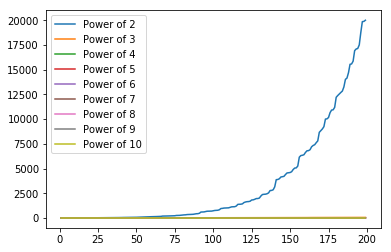

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

x = range(1, 200)
handles = []
for power in range(2, 11):
    y = [powerSum(i, power, profile=True) for i in x]
    handles.append(plt.plot(x, y, label='Power of {}'.format(power))[0])
plt.legend(handles=handles)

## Code O(logN)
Code above has exponential complexity, this is not gonna work. Let's take a mathematical approach to solve this problem

$$
X = 100\\
max\_iter = \sum_{i=1}^{X}x^n \text{  while < X}
$$

Solve equations per depth for N=2 & X = 100:

depth = 1:
    A² = X ⇒ A = √X ⇒ 10
    
depth = 2:
    A² + B² = X
  
 
To solve this problem, confer:
* [Subset sum problem](https://en.wikipedia.org/wiki/Subset_sum_problem)
* [0-1 Knapsack problem](https://en.wikipedia.org/wiki/Knapsack_problem)

In [13]:
from math import floor


def powerSum(x, n, profile=False):
    result = []
    accsum = 0
    keys = []
    for i in range(1, floor(x**(1./n))+1):
        key = i**n
        accsum += key
        keys.append((key, accsum))
    expanded = []
    
    counter = 0
    while len(keys)>0:
        counter+=1
        key, remain = keys.pop()
        for i, combination in enumerate(expanded):
            if key in combination: # Do not loop forever
                continue
            else:  # Append new possible combination
                new_comb = combination + [key]
                if sum(new_comb) == x:
                    result.append(new_comb)
                elif sum(new_comb) < x and sum(combination + [remain]) >= x:
                    expanded.append(new_comb)
        if key == x:
            result.append(key)
        elif remain >= x:
            expanded.append([key])
        
            
    if profile:
        return counter
    return len(result)

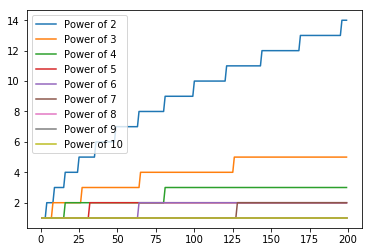

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

x = range(1, 200)
handles = []
for power in range(2, 11):
    y = [powerSum(i, power, profile=True) for i in x]
    handles.append(plt.plot(x, y, label='Power of {}'.format(power))[0])
plt.legend(handles=handles)